A prototype of the a triangle inequality approach using data points sampled uniformly from a unit square.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# Parameters
N = 500
M = 100
K = 2
SEED = 42 #1729

In [53]:
# True regression function
f = lambda x, y: x * y

In [54]:
# Generate data
np.random.seed(SEED)
X_train = np.random.uniform(0, 1, size=(N, 2))
y_train = f(X_train[:, 0], X_train[:, 1])
X_test = np.random.uniform(0, 1, size=(M, 2))
y_test = f(X_train[:, 0], X_train[:, 1])

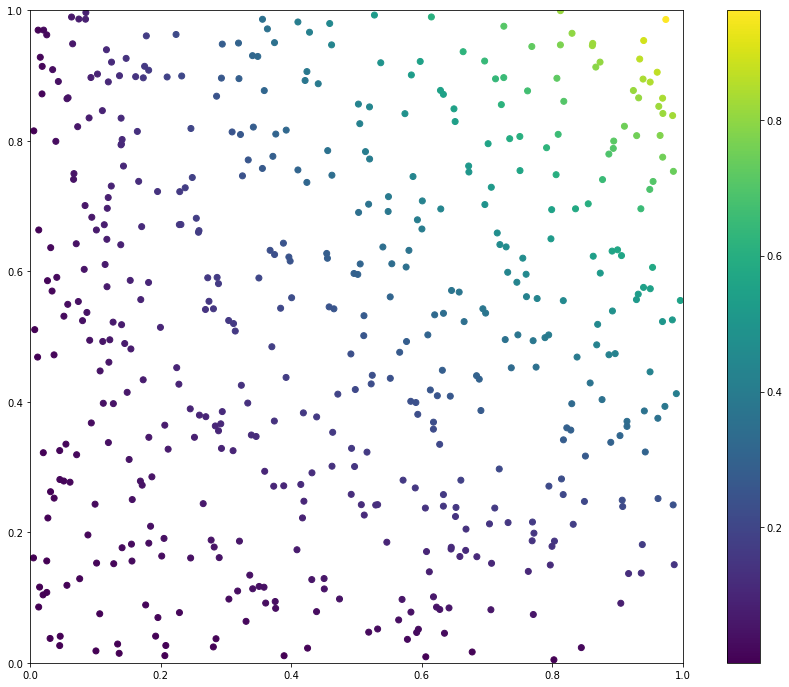

In [55]:
# Plot training data
fig, ax = plt.subplots(figsize=(16, 12))
scat = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
ax.set_aspect(1)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.colorbar(scat)
plt.show()

In [26]:
# Construct distance matrix
square_diffs = np.square(X_train[:, None, :] - X_train[None, :, :])
train_dist_1 = np.sqrt(np.sum(square_diffs, axis=-1))

In [37]:
train_dist[1][:5]

[0.0,
 0.2688638778542204,
 0.48502676836209857,
 0.5591623869233994,
 0.35683908793598185]

In [38]:
train_dist_1[1, :5]

array([0.50681969, 0.        , 0.26886388, 0.48502677, 0.55916239])

In [56]:
# Make predictions
preds = np.empty((M,))
for i, x0 in enumerate(X_test):
    possible = np.full((N,), True)
    curr_neighbours = np.empty((K, 2))
    curr_dists = np.empty((K,))
    curr_vals = np.empty((K,))
    # for j, (x, y) in enumerate(zip(X_train[K:], y_train[K:])):
    for j, (x, y) in enumerate(zip(X_train, y_train)):
        if not possible[j]:
            continue
        d = np.sqrt(np.sum(np.square(x0 - x)))
        # Rule out other points
        if j >= K:
            for l in range(N - (j + 1)):
                if not possible[l]:
                    continue
                if abs(d - train_dist[j,l]) > curr_dists[K-1]:
                    possible[l] = False
        # Compare to current neighbours
        for k in range(K):
            if k >= j or curr_dists[k] > d:
                curr_neighbours[(k+1):] = curr_neighbours[k:-1]
                curr_neighbours[k] = x
                curr_dists[(k+1):] = curr_dists[k:-1]
                curr_dists[k] = d
                curr_vals[(k+1):] = curr_vals[k:-1]
                curr_vals[k] = y
                break

    preds[i] = np.mean(curr_vals)

TypeError: list indices must be integers or slices, not tuple

In [57]:
train_dist = [
            [
                math.sqrt(distance(X_train[i], X_train[j]))
                for j in range(i + 1, N)
            ]
            for i in range(N - 1)
        ]

In [58]:
import math

def distance(x1, x2):
    return sum((e1 - e2) ** 2 for e1, e2 in zip(x1, x2))

pred = []
for x0 in X_test:
    possible = [True for i in range(N)]
    curr_neighbours = [None for i in range(K)]

    for i, (x, y) in enumerate(zip(X_train, y_train)):
        if not possible[i]:
            continue
        d = math.sqrt(distance(x0, x))
        if i >= K:
            for j in range(N - (i + 1)):
                if not possible[j]:
                    continue
                if abs(d - train_dist[i][j]) >\
                        curr_neighbours[K - 1][3]:
                    possible[j + i + 1] = False
        for k in range(K):
            if curr_neighbours[k] is None or \
                    curr_neighbours[k][3] > d:
                curr_neighbours.insert(k, (i, x, y, d))
                del curr_neighbours[K]
    
    pred.append(sum(e[2] for e in curr_neighbours) / K)

In [63]:
from sklearn.neighbors import KNeighborsRegressor

In [65]:
mod = KNeighborsRegressor(K).fit(X_train, y_train)
truth = mod.predict(X_test)

In [66]:
truth[:5]

array([0.09852646, 0.625941  , 0.53710723, 0.58486236, 0.12357247])

In [67]:
pred[:5]

[0.09437377533234964,
 0.6499304377468318,
 0.5188630724421847,
 0.618041262618851,
 0.10162009741203472]

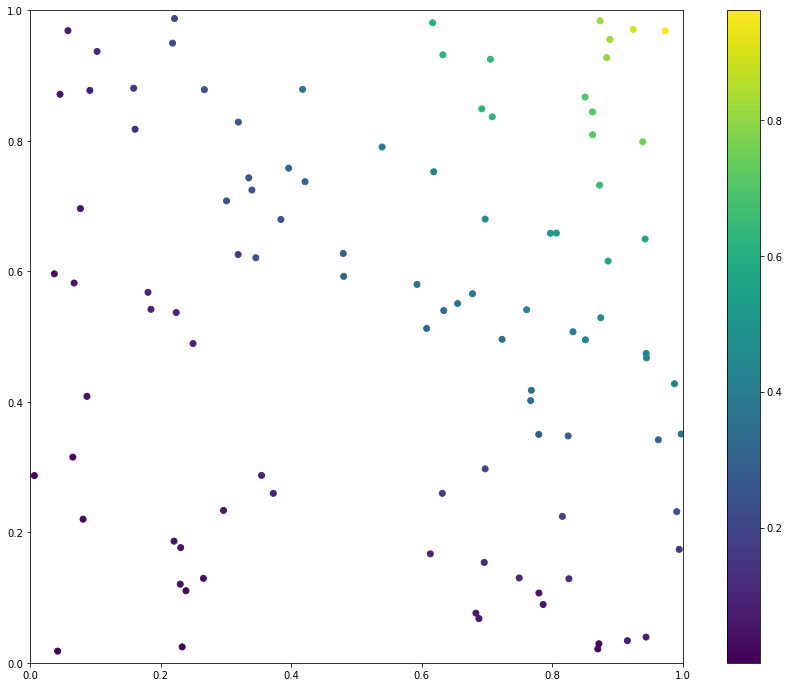

In [60]:
# Plot predictions
fig, ax = plt.subplots(figsize=(16, 12))
scat = ax.scatter(X_test[:, 0], X_test[:, 1], c=pred)
ax.set_aspect(1)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.colorbar(scat)
plt.show()